Results for 12-month period:
                 Model         MSE        R2
0    Linear Regression    0.521964  0.999172
1     Ridge Regression    1.046038  0.998341
2     Lasso Regression    7.725225  0.987747
3        Decision Tree  361.460443  0.426696
4        Random Forest  384.884991  0.389542
5    Gradient Boosting  429.252409  0.319172
6             AdaBoost  418.127909  0.336816
7          Extra Trees  406.561763  0.355161
8  K-Nearest Neighbors  392.127156  0.378056
9              XGBoost  418.694457  0.335918

Best model for 12-month period: Linear Regression


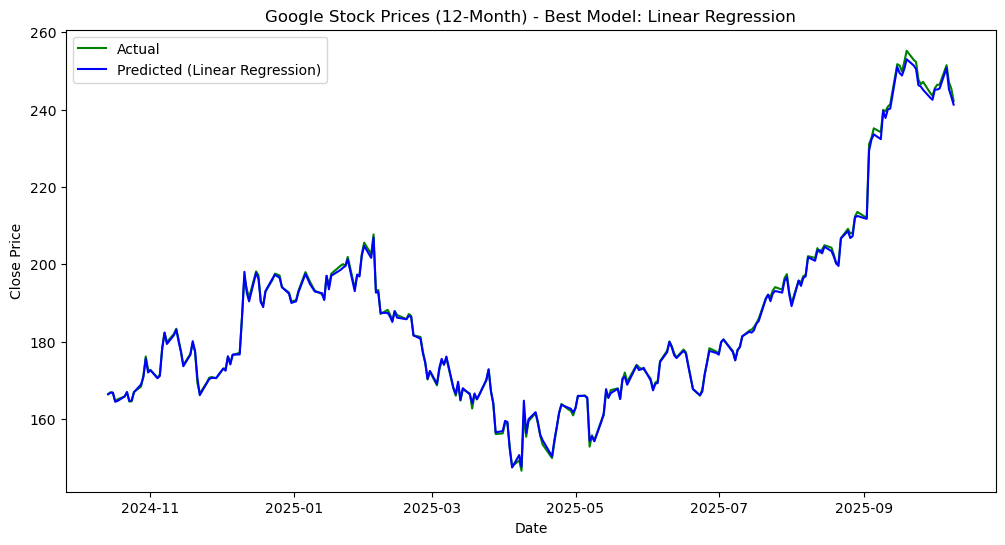

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv("google.csv", parse_dates=['Date'])
df.sort_values('Date', inplace=True)

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = df[col].astype(float)

training_start = '2023-10-14'  
training_end = '2024-10-13'
testing_start = '2024-10-14'
testing_end = '2025-10-14'

train_df = df[(df['Date'] >= training_start) & (df['Date'] <= training_end)].copy()
test_df = df[(df['Date'] >= testing_start) & (df['Date'] <= testing_end)].copy()

train_df['Target'] = train_df['Close'].shift(-1)  
train_df.dropna(inplace=True)

X_train = train_df[['Open', 'High', 'Low', 'Close', 'Volume']]
y_train = train_df['Target']

X_test = test_df[['Open', 'High', 'Low', 'Close', 'Volume']]
y_test = test_df['Close'].values
test_dates = test_df['Date'].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(max_iter=10000),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror')
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R2': r2})

results_df = pd.DataFrame(results)
print("Results for 12-month period:")
print(results_df)

best_model_name = results_df.loc[results_df['R2'].idxmax(), 'Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

print(f"\nBest model for 12-month period: {best_model_name}")

plt.figure(figsize=(12,6))
plt.plot(test_dates, y_test, label='Actual', color='green')
plt.plot(test_dates, y_pred_best, label=f'Predicted ({best_model_name})', color='blue')
plt.title(f"Google Stock Prices (12-Month) - Best Model: {best_model_name}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()



--- Daily Results ---
                 Model         MSE        R2
0    Linear Regression   13.461868  0.978614
1     Ridge Regression   14.020643  0.977726
2     Lasso Regression   31.083767  0.950619
3        Decision Tree  366.089924  0.418408
4        Random Forest  400.442233  0.363834
5    Gradient Boosting  427.386703  0.321029
6             AdaBoost  479.938736  0.237542
7          Extra Trees  408.561538  0.350936
8  K-Nearest Neighbors  430.530173  0.316035
9              XGBoost  419.513408  0.333537

Best Daily model: Linear Regression


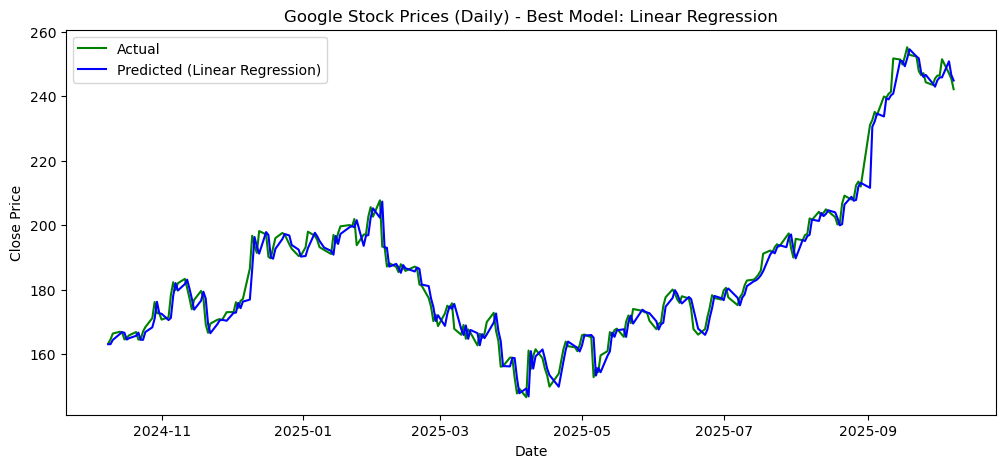


--- Weekly Results ---
                 Model         MSE        R2
0    Linear Regression   66.776791  0.899285
1     Ridge Regression   66.551936  0.899624
2     Lasso Regression   97.811934  0.852477
3        Decision Tree  659.845756  0.004798
4        Random Forest  575.576585  0.131895
5    Gradient Boosting  582.414030  0.121583
6             AdaBoost  536.752363  0.190451
7          Extra Trees  601.224943  0.093212
8  K-Nearest Neighbors  628.549239  0.052000
9              XGBoost  613.131738  0.075253

Best Weekly model: Ridge Regression


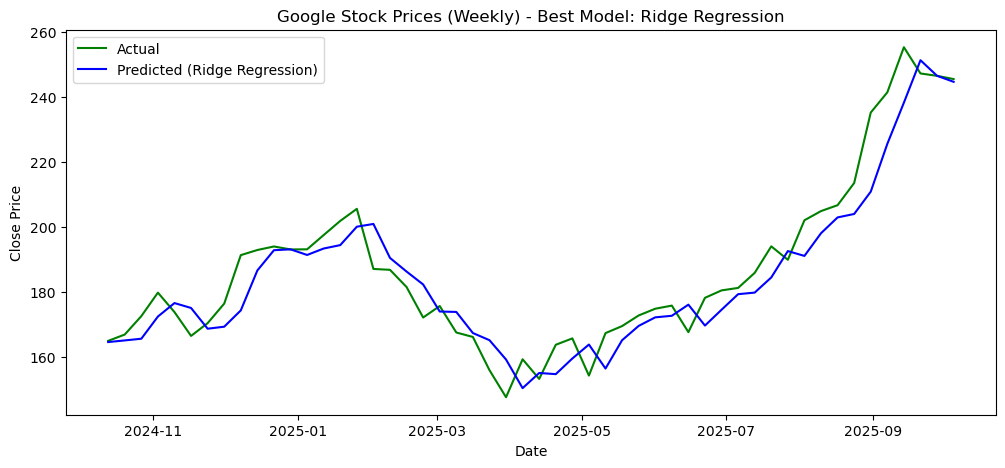


--- Monthly Results ---
                 Model          MSE        R2
0    Linear Regression   357.227362  0.564709
1     Ridge Regression   411.514359  0.498559
2     Lasso Regression   491.524122  0.401065
3        Decision Tree  1146.709683 -0.397296
4        Random Forest  1084.660188 -0.321687
5    Gradient Boosting  1286.044510 -0.567079
6             AdaBoost  1098.885859 -0.339022
7          Extra Trees  1246.562879 -0.518970
8  K-Nearest Neighbors  1303.897138 -0.588833
9              XGBoost  1191.443096 -0.451805

Best Monthly model: Linear Regression


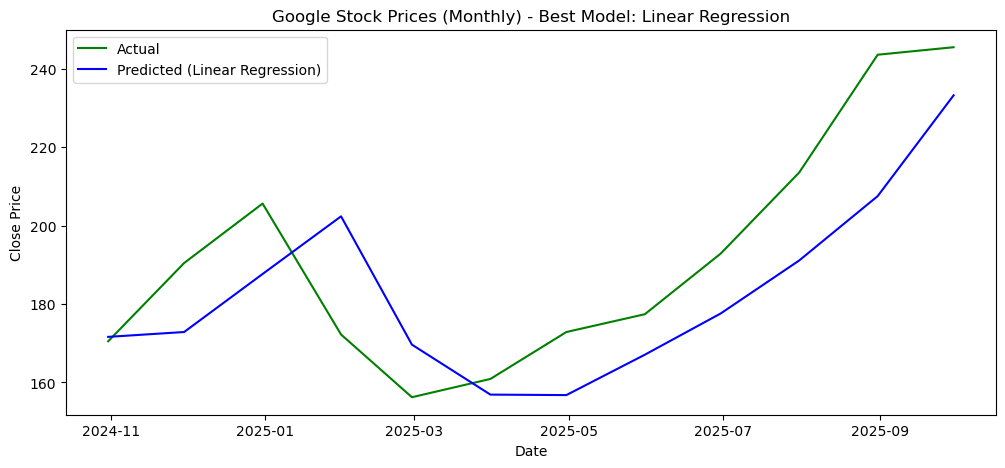

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("google.csv", parse_dates=['Date'])
df.sort_values('Date', inplace=True)

df['Volume'] = df['Volume'].astype(str).str.replace(',', '').astype(float)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(max_iter=10000),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror')
}

def train_evaluate_plot(df_freq, freq_label='Daily'):
    df_freq['Target'] = df_freq['Close'].shift(-1)
    df_freq.dropna(inplace=True)

    X = df_freq[['Open','High','Low','Close','Volume']]
    y = df_freq['Target'].values
    dates = df_freq['Date'].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    split_idx = int(len(df_freq)*0.8)
    X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    dates_test = dates[split_idx:]

    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({'Model': name, 'MSE': mse, 'R2': r2})

    results_df = pd.DataFrame(results)
    best_model_name = results_df.loc[results_df['R2'].idxmax(), 'Model']
    best_model = models[best_model_name]
    y_pred_best = best_model.predict(X_test)

    print(f"\n--- {freq_label} Results ---")
    print(results_df)
    print(f"\nBest {freq_label} model: {best_model_name}")

    plt.figure(figsize=(12,5))
    plt.plot(dates_test, y_test, label='Actual', color='green')
    plt.plot(dates_test, y_pred_best, label=f'Predicted ({best_model_name})', color='blue')
    plt.title(f"Google Stock Prices ({freq_label}) - Best Model: {best_model_name}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.show()


train_evaluate_plot(df, freq_label='Daily')

df_weekly = df.resample('W', on='Date').agg({'Open':'first','High':'max','Low':'min','Close':'last','Volume':'sum'}).reset_index()
train_evaluate_plot(df_weekly, freq_label='Weekly')

df_monthly = df.resample('M', on='Date').agg({'Open':'first','High':'max','Low':'min','Close':'last','Volume':'sum'}).reset_index()
train_evaluate_plot(df_monthly, freq_label='Monthly')


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("google.csv", parse_dates=['Date'])
df.sort_values('Date', inplace=True)

for col in ['Open','High','Low','Close','Volume']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

train_df = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2024-12-31')].copy()

train_df['Target_Open'] = train_df['Open'].shift(-1)
train_df['Target_High'] = train_df['High'].shift(-1)
train_df['Target_Low'] = train_df['Low'].shift(-1)
train_df['Target_Close'] = train_df['Close'].shift(-1)
train_df.dropna(inplace=True)

X_train = train_df[['Open','High','Low','Close','Volume']]
y_train = train_df[['Target_Open','Target_High','Target_Low','Target_Close']]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(max_iter=10000),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror')
}

trained_models = {}
for name, model in models.items():
    if name in ['XGBoost','Gradient Boosting','AdaBoost','Random Forest','Extra Trees','Decision Tree']:
        multi_model = MultiOutputRegressor(model)
    else:
        multi_model = model
    multi_model.fit(X_train_scaled, y_train)
    trained_models[name] = multi_model

start_date = input("Enter prediction start date (YYYY-MM-DD): ")
end_date = input("Enter prediction end date (YYYY-MM-DD): ")

test_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()
if test_df.empty:
    raise ValueError("No data found for the given date range!")

X_test = test_df[['Open','High','Low','Close','Volume']]
X_test_scaled = scaler.transform(X_test)
test_dates = test_df['Date'].dt.strftime('%Y-%m-%d').values

results = []
predictions = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    mse = mean_squared_error(test_df[['Open','High','Low','Close']], y_pred)
    r2 = r2_score(test_df[['Open','High','Low','Close']], y_pred)
    results.append({'Model': name, 'MSE': mse, 'R2': r2})

results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print("\nModel performance for this week:")
print(results_df)

best_model_name = results_df.iloc[0]['Model']
y_pred_best = predictions[best_model_name]
print(f"\nBest model: {best_model_name}")

predicted_df = test_df.copy()
predicted_df[['Pred_Open','Pred_High','Pred_Low','Pred_Close']] = y_pred_best
print("\nPredicted values:")
print(predicted_df[['Date','Open','High','Low','Close','Volume','Pred_Open','Pred_High','Pred_Low','Pred_Close']])

plt.figure(figsize=(12,5))
plt.plot(test_dates, predicted_df['Close'], label='Actual Close', color='green', marker='o')
plt.plot(test_dates, predicted_df['Pred_Close'], label=f'Predicted Close ({best_model_name})', color='blue', marker='x')
plt.title(f"Google Stock Prices ({start_date} to {end_date}) - Best Model: {best_model_name}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Enter prediction start date (YYYY-MM-DD):  stop
Enter prediction end date (YYYY-MM-DD):  stop


TypeError: Invalid comparison between dtype=datetime64[ns] and str

In [1]:
import tensorflow as tf
print(tf.__version__)


2.20.0


Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0247
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0025
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0022
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0021 
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0019 
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0019 
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0020 
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0018    
Epoch 9/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0016 
Epoch 10/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0015 
Epoch 11/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0015  
Epoch 12/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0015     
Epoch 13/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0015 
Epoch 14/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0016
Epoch 15/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step -

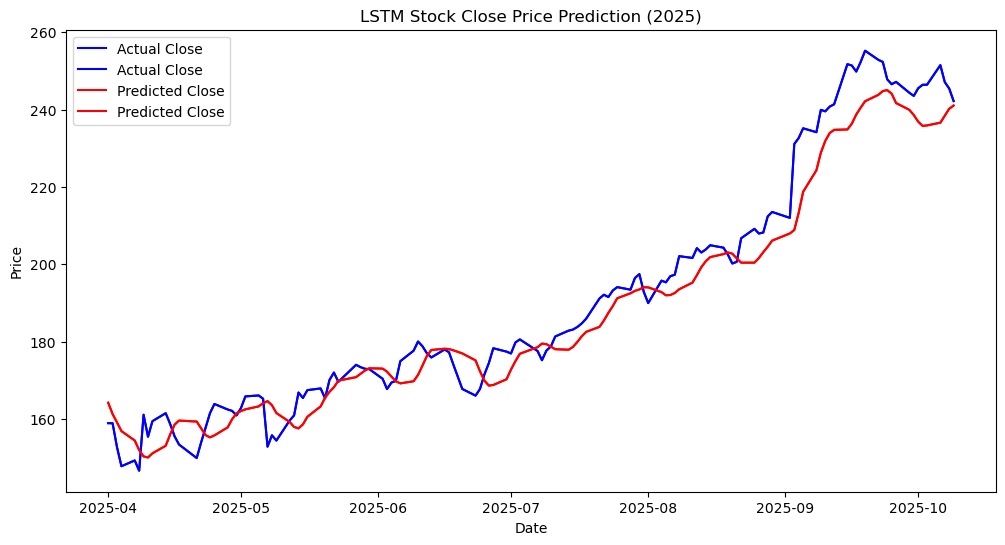

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

df = pd.read_csv("google.csv")

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

numeric_cols = ['Open', 'High', 'Low', 'Close']
df[numeric_cols] = df[numeric_cols].replace(',', '', regex=True).astype(float)

train_df = df[df['Date'].dt.year <= 2024]
test_df = df[df['Date'].dt.year == 2025]

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[numeric_cols])
test_scaled = scaler.transform(test_df[numeric_cols])

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i])  
    return np.array(X), np.array(y)

seq_len = 60
X_train, y_train = create_sequences(train_scaled, seq_len)
X_test, y_test = create_sequences(test_scaled, seq_len)

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100),
    Dense(4)  # Predict Open, High, Low, Close
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)

predicted_df = pd.DataFrame(predicted_prices, columns=['Pred_Open', 'Pred_High', 'Pred_Low', 'Pred_Close'])
actual_df = pd.DataFrame(actual_prices, columns=['Actual_Open', 'Actual_High', 'Actual_Low', 'Actual_Close'])

aligned_dates = test_df['Date'].values[seq_len:]
predicted_df['Date'] = aligned_dates
actual_df['Date'] = aligned_dates

results = pd.concat([predicted_df, actual_df], axis=1)
print("\nPredicted vs Actual Prices (2025):")
print(results.head())

plt.figure(figsize=(12, 6))
plt.plot(results['Date'], results['Actual_Close'], label='Actual Close', color='blue')
plt.plot(results['Date'], results['Pred_Close'], label='Predicted Close', color='red')
plt.title('LSTM Stock Close Price Prediction (2025)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

df['High_lag1'] = df['High'].shift(1)   # Previous day's High
df['High_lag2'] = df['High'].shift(2)   # 2 days ago
df['Close_lag1'] = df['Close'].shift(1) # Previous day's Close

df = df.dropna()

X = df[['Open', 'Low', 'Close', 'Volume', 'High_lag1', 'High_lag2', 'Close_lag1']]
y = df['High']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE: 1.3994404354016514
R2: 0.997760195392145


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

df['High_lag1'] = df['High'].shift(1)
df['High_lag2'] = df['High'].shift(2)
df['High_lag3'] = df['High'].shift(3)

df['High_roll3'] = df['High'].rolling(window=3).mean()
df['High_roll5'] = df['High'].rolling(window=5).mean()

df['Vol_change'] = df['Volume'].pct_change()

df['High_pct_change'] = df['High'].pct_change()

df = df.dropna()
df_filtered = df.copy()  

X = df_filtered[['Open', 'Low', 'Close', 'Volume', 'High_lag1', 'High_lag2', 'High_lag3',
                 'High_roll3', 'High_roll5', 'Vol_change', 'High_pct_change']]
y = df_filtered['High']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

df_result = X_test.copy()
df_result['Actual_High'] = y_test.values
df_result['Pred_High'] = y_pred
print(df_result[['Actual_High', 'Pred_High']].tail())


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)



      Actual_High   Pred_High
1243       247.12  247.678344
1244       252.20  250.418896
1245       251.55  251.354386
1246       247.26  248.672078
1247       245.56  246.094590
MSE: 0.649261796421045
R2: 0.9989614660120445


# Perfect High Prediction

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])

df['High_1'] = df['High'].shift(1)
df['High_2'] = df['High'].shift(2)
df['Open_1'] = df['Open'].shift(1)
df['Close_1'] = df['Close'].shift(1)
df['High_Low_Range'] = df['High'] - df['Low']
df['Volume_Change'] = df['Volume'].pct_change()
df['High_EMA5'] = df['High'].ewm(span=5, adjust=False).mean()
df.dropna(inplace=True)


df['High_MA3'] = df['High'].rolling(3).mean()
df['High_MA5'] = df['High'].rolling(5).mean()

df.dropna(inplace=True)

X = df[['Open', 'Low', 'Close', 'Volume', 'High_1', 'High_2', 'Open_1', 'Close_1', 'High_MA3', 'High_MA5']]
y = df['High']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid = GridSearchCV(ridge, alphas, cv=5)
grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_
y_pred = best_ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best alpha:", grid.best_params_)
print("Test MSE:", mse)
print("Test R2 Score:", r2)

df_result = df.iloc[-len(y_test):].copy()  # last n rows = test set
df_result['Pred_High'] = y_pred
print(df_result[['Date', 'High', 'Pred_High']].tail(10))



Best alpha: {'alpha': 0.001}
Test MSE: 0.00026088267514727125
Test R2 Score: 0.9999995827021911
           Date    High   Pred_High
1238 2025-09-26  250.12  250.109875
1239 2025-09-29  251.65  251.612660
1240 2025-09-30  243.68  243.720074
1241 2025-10-01  247.15  247.130913
1242 2025-10-02  247.64  247.654338
1243 2025-10-03  247.12  247.135631
1244 2025-10-06  252.20  252.180111
1245 2025-10-07  251.55  251.531680
1246 2025-10-08  247.26  247.270829
1247 2025-10-09  245.56  245.567475


# Low prediction

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])

df['Low_1'] = df['Low'].shift(1)
df['Low_2'] = df['Low'].shift(2)
df['Low_High_Range'] = df['High'] - df['Low']
df['Volume_Change'] = df['Volume'].pct_change()
df['Low_EMA5'] = df['Low'].ewm(span=5, adjust=False).mean()

df['Low_MA3'] = df['Low'].rolling(3).mean()
df['Low_MA5'] = df['Low'].rolling(5).mean()

df.dropna(inplace=True)

X_low = df[['Open', 'High', 'Close', 'Volume', 'Low_1', 'Low_2', 'Open_1', 'Close_1', 'Low_MA3', 'Low_MA5']]
y_low = df['Low']

X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge()
alphas = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(ridge, alphas, cv=5)
grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_
y_pred = best_ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best alpha:", grid.best_params_)
print("Test MSE:", mse)
print("Test R2 Score:", r2)


df_result = df.iloc[-len(y_test):].copy()
df_result['Pred_Low'] = y_pred
print(df_result[['Date', 'Low', 'Pred_Low']].tail(10))


Best alpha: {'alpha': 0.001}
Test MSE: 0.0003369806348374616
Test R2 Score: 0.9999994566942721
           Date     Low    Pred_Low
1238 2025-09-26  246.64  246.610139
1239 2025-09-29  243.20  243.206766
1240 2025-09-30  239.57  239.594751
1241 2025-10-01  239.20  239.221538
1242 2025-10-02  243.11  243.115974
1243 2025-10-03  242.47  242.488959
1244 2025-10-06  245.69  245.696346
1245 2025-10-07  246.81  246.790471
1246 2025-10-08  245.09  245.071195
1247 2025-10-09  239.68  239.709931


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])

df['High_1'] = df['High'].shift(1)
df['High_2'] = df['High'].shift(2)
df['Low_1'] = df['Low'].shift(1)
df['Low_2'] = df['Low'].shift(2)
df['Open_1'] = df['Open'].shift(1)
df['Close_1'] = df['Close'].shift(1)
df['Volume_Change'] = df['Volume'].pct_change()
df['High_EMA5'] = df['High'].ewm(span=5, adjust=False).mean()
df['Low_EMA5'] = df['Low'].ewm(span=5, adjust=False).mean()

df['High_MA3'] = df['High'].rolling(3).mean()
df['High_MA5'] = df['High'].rolling(5).mean()
df['Low_MA3'] = df['Low'].rolling(3).mean()
df['Low_MA5'] = df['Low'].rolling(5).mean()

df.dropna(inplace=True)

X = df[['Open', 'Close', 'Volume', 
        'High_1', 'High_2', 'Low_1', 'Low_2', 'Open_1', 'Close_1', 
        'High_MA3', 'High_MA5', 'Low_MA3', 'Low_MA5']]
y = df[['High', 'Low']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid = GridSearchCV(ridge, alphas, cv=5)
grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_
y_pred = best_ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Best alpha:", grid.best_params_)
print("Test MSE (High, Low):", mse)
print("Test R2 Score (High, Low):", r2)

df_result = df.iloc[-len(y_test):].copy()  
df_result['Pred_High'] = y_pred[:, 0]
df_result['Pred_Low'] = y_pred[:, 1]

print(df_result[['Date', 'High', 'Pred_High', 'Low', 'Pred_Low']].tail(10))


Best alpha: {'alpha': 0.001}
Test MSE (High, Low): 0.0003933296116028457
Test R2 Score (High, Low): [0.99999945 0.99999929]
           Date    High   Pred_High     Low    Pred_Low
1238 2025-09-26  250.12  250.111451  246.64  246.606477
1239 2025-09-29  251.65  251.613144  243.20  243.204263
1240 2025-09-30  243.68  243.724143  239.57  239.587266
1241 2025-10-01  247.15  247.132652  239.20  239.222693
1242 2025-10-02  247.64  247.657739  243.11  243.108934
1243 2025-10-03  247.12  247.147375  242.47  242.478812
1244 2025-10-06  252.20  252.187508  245.69  245.691261
1245 2025-10-07  251.55  251.539720  246.81  246.781006
1246 2025-10-08  247.26  247.277166  245.09  245.063420
1247 2025-10-09  245.56  245.575307  239.68  239.700760


# Close Prediction

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])

df['Close_1'] = df['Close'].shift(1)
df['Close_2'] = df['Close'].shift(2)
df['High_1'] = df['High'].shift(1)
df['Low_1'] = df['Low'].shift(1)
df['Open_1'] = df['Open'].shift(1)
df['Volume_Change'] = df['Volume'].pct_change()

df['Close_MA3'] = df['Close'].rolling(3).mean()
df['Close_MA5'] = df['Close'].rolling(5).mean()
df['High_MA3'] = df['High'].rolling(3).mean()
df['Low_MA3'] = df['Low'].rolling(3).mean()

df.dropna(inplace=True)

X = df[['Open', 'High', 'Low', 'Volume', 
        'Close_1', 'Close_2', 'Open_1', 'High_1', 'Low_1', 
        'Close_MA3', 'Close_MA5', 'High_MA3', 'Low_MA3']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid = GridSearchCV(ridge, alphas, cv=5)
grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_
y_pred = best_ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best alpha:", grid.best_params_)
print("Test MSE:", mse)
print("Test R2 Score:", r2)

df_result = df.iloc[-len(y_test):].copy()
df_result['Pred_Close'] = y_pred

print(df_result[['Date', 'Close', 'Pred_Close']].tail(10))


Best alpha: {'alpha': 0.001}
Test MSE: 0.000183351971464472
Test R2 Score: 0.9999997100803235
           Date   Close  Pred_Close
1238 2025-09-26  247.18  247.202864
1239 2025-09-29  244.36  244.389115
1240 2025-09-30  243.55  243.514646
1241 2025-10-01  245.54  245.524949
1242 2025-10-02  246.43  246.424576
1243 2025-10-03  246.45  246.431304
1244 2025-10-06  251.51  251.502342
1245 2025-10-07  247.13  247.157381
1246 2025-10-08  245.46  245.466885
1247 2025-10-09  242.21  242.195532


# Open Prediction

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])

df['Open_1'] = df['Open'].shift(1)
df['Open_2'] = df['Open'].shift(2)
df['Close_1'] = df['Close'].shift(1)
df['Close_2'] = df['Close'].shift(2)
df['High_1'] = df['High'].shift(1)
df['High_2'] = df['High'].shift(2)
df['Low_1'] = df['Low'].shift(1)
df['Low_2'] = df['Low'].shift(2)

df['Overnight_Return'] = (df['Open'] - df['Close_1']) / df['Close_1']

df['Open_MA3'] = df['Open'].rolling(3).mean()
df['Open_EMA5'] = df['Open'].ewm(span=5, adjust=False).mean()
df['High_Low_Range'] = df['High'] - df['Low']
df['Volatility_3'] = df['High'].rolling(3).std()

df.dropna(inplace=True)

X = df[['Open_1','Open_2','Close_1','Close_2','High_1','High_2','Low_1','Low_2',
        'Overnight_Return','Open_MA3','Open_EMA5','High_Low_Range','Volatility_3',
        'Volume']]
y = df['Open']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge = Ridge()
grid = GridSearchCV(ridge, alphas, cv=5)
grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_
y_pred = best_ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best alpha:", grid.best_params_)
print("Test MSE:", mse)
print("Test R2 Score:", r2)

df_result = df.iloc[-len(y_test):].copy() 
df_result['Pred_Open'] = y_pred
print(df_result[['Date', 'Open', 'Pred_Open']].tail(10))


Best alpha: {'alpha': 0.001}
Test MSE: 0.002790634191628626
Test R2 Score: 0.9999954929190201
           Date    Open   Pred_Open
1238 2025-09-26  247.79  247.760705
1239 2025-09-29  248.28  248.244015
1240 2025-09-30  243.06  243.097934
1241 2025-10-01  241.18  241.251546
1242 2025-10-02  245.64  245.653930
1243 2025-10-03  245.23  245.277626
1244 2025-10-06  245.78  245.804734
1245 2025-10-07  248.93  249.020845
1246 2025-10-08  246.20  246.231798
1247 2025-10-09  245.06  245.060388


# Volume Prediction

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])

df['Volume_1'] = df['Volume'].shift(1)
df['Volume_2'] = df['Volume'].shift(2)
df['Open_1'] = df['Open'].shift(1)
df['Close_1'] = df['Close'].shift(1)
df['High_1'] = df['High'].shift(1)
df['Low_1'] = df['Low'].shift(1)

df['Open_Change'] = df['Open'] - df['Open_1']
df['Close_Change'] = df['Close'] - df['Close_1']
df['High_Low_Range'] = df['High'] - df['Low']
df['Volume_Change'] = df['Volume'].pct_change()

df['Volume_MA3'] = df['Volume'].rolling(3).mean()
df['Volume_MA5'] = df['Volume'].rolling(5).mean()
df['Volatility_3'] = df['Volume'].rolling(3).std()

df.dropna(inplace=True)

X = df[['Volume_1','Volume_2','Open_1','Close_1','High_1','Low_1',
        'Open_Change','Close_Change','High_Low_Range','Volume_MA3','Volume_MA5','Volatility_3']]
y = df['Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge = Ridge()
grid = GridSearchCV(ridge, alphas, cv=5)
grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_
y_pred = best_ridge.predict(X_test_scaled)

y_test_m = y_test / 1e6
y_pred_m = y_pred / 1e6

mse_m = mean_squared_error(y_test_m, y_pred_m)
r2 = r2_score(y_test_m, y_pred_m)

print("Best alpha:", grid.best_params_)
print("Test MSE (millions):", mse_m)
print("Test R2 Score:", r2)

df_result = df.loc[y_test.index].copy()  # Use the same index as y_test
df_result['Volume_M'] = y_test / 1e6
df_result['Pred_Volume_M'] = y_pred / 1e6
print(df_result[['Date', 'Volume_M', 'Pred_Volume_M']].tail(10))


Best alpha: {'alpha': 0.001}
Test MSE (millions): 2.0599358853087495e-08
Test R2 Score: 0.9999999998027144
           Date   Volume_M  Pred_Volume_M
1238 2025-09-26  16.594609      16.594455
1239 2025-09-29  23.157250      23.157330
1240 2025-09-30  22.541189      22.540973
1241 2025-10-01  23.967660      23.967583
1242 2025-10-02  20.657520      20.657344
1243 2025-10-03  19.941381      19.941257
1244 2025-10-06  18.309029      18.309020
1245 2025-10-07  13.811170      13.811192
1246 2025-10-08  14.136490      14.136315
1247 2025-10-09  19.375721      19.375734


# ALL Predictions

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])

for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[f'{col}_1'] = df[col].shift(1)
    df[f'{col}_2'] = df[col].shift(2)

df['Open_Change'] = df['Open'] - df['Open_1']
df['Close_Change'] = df['Close'] - df['Close_1']
df['High_Low_Range'] = df['High'] - df['Low']
df['Volume_Change'] = df['Volume'].pct_change()

# Open
df['Open_MA3'] = df['Open'].rolling(3).mean()
df['Open_EMA5'] = df['Open'].ewm(span=5, adjust=False).mean()
df['Open_Volatility_3'] = df['Open'].rolling(3).std()
# High
df['High_MA3'] = df['High'].rolling(3).mean()
df['High_EMA5'] = df['High'].ewm(span=5, adjust=False).mean()
df['High_Volatility_3'] = df['High'].rolling(3).std()
# Low
df['Low_MA3'] = df['Low'].rolling(3).mean()
df['Low_EMA5'] = df['Low'].ewm(span=5, adjust=False).mean()
df['Low_Volatility_3'] = df['Low'].rolling(3).std()
# Volume
df['Volume_MA3'] = df['Volume'].rolling(3).mean()
df['Volume_MA5'] = df['Volume'].rolling(5).mean()
df['Volume_Volatility_3'] = df['Volume'].rolling(3).std()

df.dropna(inplace=True)

targets = ['Open', 'High', 'Low', 'Close', 'Volume']
results = pd.DataFrame({'Date': df['Date'].iloc[-len(df)//5:]})  # placeholder for final predictions

for target in targets:
    if target == 'Open':
        features = ['Open_1','Open_2','Close_1','Close_2','High_1','High_2','Low_1','Low_2',
                    'Open_Change','Close_Change','High_Low_Range','Open_MA3','Open_EMA5','Open_Volatility_3','Volume']
        alpha_grid = [0.001, 0.01, 0.1, 1, 10]
    elif target == 'High':
        features = ['High_1','High_2','Open_1','Close_1','Low_1','Open_Change','Close_Change',
                    'High_Low_Range','High_MA3','High_EMA5','High_Volatility_3','Volume']
        alpha_grid = [0.01, 0.1, 1]
    elif target == 'Low':
        features = ['Low_1','Low_2','Open_1','Close_1','High_1','Open_Change','Close_Change',
                    'High_Low_Range','Low_MA3','Low_EMA5','Low_Volatility_3','Volume']
        alpha_grid = [0.01, 0.1, 1]
    elif target == 'Close':
        features = ['Close_1','Close_2','Open_1','High_1','Low_1','Open_Change','Close_Change','High_Low_Range','Volume']
        alpha_grid = [0.001, 0.01, 0.1]
    else:  # Volume
        features = ['Volume_1','Volume_2','Open_1','Close_1','High_1','Low_1',
                    'Open_Change','Close_Change','High_Low_Range','Volume_MA3','Volume_MA5','Volume_Volatility_3']
        alpha_grid = [0.001, 0.01, 0.1]

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ridge = Ridge()
    grid = GridSearchCV(ridge, {'alpha': alpha_grid}, cv=5)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{target} -> Best alpha: {grid.best_params_}, Test MSE: {mse:.6f}, R2: {r2:.6f}")

    results[f'Actual_{target}'] = y_test.values
    if target == 'Volume':
        results[f'Pred_{target}_M'] = y_pred / 1e6  # in millions
        results[f'Actual_{target}_M'] = y_test.values / 1e6
    else:
        results[f'Pred_{target}'] = y_pred

# --- Show last 10 predictions ---
print(results.tail(10))


Open -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000001, R2: 1.000000
High -> Best alpha: {'alpha': 0.01}, Test MSE: 0.034248, R2: 0.999946
Low -> Best alpha: {'alpha': 0.01}, Test MSE: 0.033634, R2: 0.999946
Close -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000002, R2: 1.000000
Volume -> Best alpha: {'alpha': 0.001}, Test MSE: 21800.495252, R2: 1.000000
           Date  Actual_Open   Pred_Open  Actual_High   Pred_High  Actual_Low  \
1238 2025-09-26       247.79  247.789441       250.12  249.837006      246.64   
1239 2025-09-29       248.28  248.281175       251.65  251.426174      243.20   
1240 2025-09-30       243.06  243.061222       243.68  244.158336      239.57   
1241 2025-10-01       241.18  241.179407       247.15  247.198358      239.20   
1242 2025-10-02       245.64  245.641776       247.64  247.802837      243.11   
1243 2025-10-03       245.23  245.230382       247.12  247.369612      242.47   
1244 2025-10-06       245.78  245.780141       252.20  252.128143      245

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])

for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[f'{col}_1'] = df[col].shift(1)
    df[f'{col}_2'] = df[col].shift(2)

df['Open_MA3'] = df['Open'].rolling(3).mean()
df['Open_EMA5'] = df['Open'].ewm(span=5, adjust=False).mean()
df['High_MA3'] = df['High'].rolling(3).mean()
df['High_EMA5'] = df['High'].ewm(span=5, adjust=False).mean()
df['Low_MA3'] = df['Low'].rolling(3).mean()
df['Low_EMA5'] = df['Low'].ewm(span=5, adjust=False).mean()
df['Close_MA3'] = df['Close'].rolling(3).mean()
df['Close_EMA5'] = df['Close'].ewm(span=5, adjust=False).mean()

df['High_Low_Range'] = df['High'] - df['Low']
df['Open_Volatility3'] = df['Open'].rolling(3).std()
df['High_Volatility3'] = df['High'].rolling(3).std()
df['Low_Volatility3'] = df['Low'].rolling(3).std()
df['Close_Volatility3'] = df['Close'].rolling(3).std()
df['Volume_Volatility3'] = df['Volume'].rolling(3).std()
df['Volume_MA3'] = df['Volume'].rolling(3).mean()
df['Volume_MA5'] = df['Volume'].rolling(5).mean()

df.dropna(inplace=True)

feature_sets = {
    'Open': ['Open_1','Open_2','Close_1','Close_2','High_1','High_2','Low_1','Low_2',
             'Open_MA3','Open_EMA5','High_Low_Range','Open_Volatility3','Volume'],
    
    'High': ['High_1','High_2','Open_1','Open_2','Close_1','Low_1',
             'High_MA3','High_EMA5','High_Volatility3','High_Low_Range'],
    
    'Low': ['Low_1','Low_2','Open_1','Open_2','Close_1','High_1',
            'Low_MA3','Low_EMA5','Low_Volatility3','High_Low_Range'],
    
    'Close': ['Close_1','Close_2','Open_1','Open_2','High_1','Low_1',
              'Close_MA3','Close_EMA5','Close_Volatility3','High_Low_Range'],
    
    'Volume': ['Volume_1','Volume_2','Open_1','Close_1','High_1','Low_1',
               'Volume_MA3','Volume_MA5','Volume_Volatility3','High_Low_Range']
}

predictions = pd.DataFrame()  
metrics = {}

for target, features in feature_sets.items():
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    
    if target == 'Volume':
        y_train_scaled = y_train.values / 1e6
        y_test_scaled = y_test.values / 1e6
    else:
        y_train_scaled = y_train.values
        y_test_scaled = y_test.values
    
    ridge = Ridge()
    grid = GridSearchCV(ridge, {'alpha':[0.001,0.01,0.1,1,10]}, cv=5)
    grid.fit(X_train_scaled, y_train_scaled)
    
    y_pred_scaled = grid.best_estimator_.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    r2 = r2_score(y_test_scaled, y_pred_scaled)
    metrics[target] = {'Best_alpha': grid.best_params_, 'MSE': mse, 'R2': r2}
    
    if target == 'Volume':
        predictions[f'Actual_{target}_M'] = pd.Series(y_test_scaled, index=y_test.index)
        predictions[f'Pred_{target}_M'] = pd.Series(y_pred_scaled, index=y_test.index)
    else:
        predictions[f'Actual_{target}'] = pd.Series(y_test_scaled, index=y_test.index)
        predictions[f'Pred_{target}'] = pd.Series(y_pred_scaled, index=y_test.index)

predictions['Date'] = df.loc[predictions.index, 'Date']

for target, metric in metrics.items():
    print(f"{target} -> Best alpha: {metric['Best_alpha']}, Test MSE: {metric['MSE']:.6f}, R2: {metric['R2']:.6f}")

print(predictions.tail(10))




Open -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000055, R2: 1.000000
High -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000060, R2: 1.000000
Low -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000068, R2: 1.000000
Close -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000049, R2: 1.000000
Volume -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000000, R2: 1.000000
      Actual_Open   Pred_Open  Actual_High   Pred_High  Actual_Low  \
1238       247.79  247.790128       250.12  250.115988      246.64   
1239       248.28  248.281456       251.65  251.655745      243.20   
1240       243.06  243.065186       243.68  243.692752      239.57   
1241       241.18  241.186858       247.15  247.148237      239.20   
1242       245.64  245.645036       247.64  247.645886      243.11   
1243       245.23  245.236279       247.12  247.129092      242.47   
1244       245.78  245.781486       252.20  252.192446      245.69   
1245       248.93  248.935602       251.55  251.556344      246.81   
1246       24

Open -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000055, R2: 1.000000
High -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000060, R2: 1.000000
Low -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000068, R2: 1.000000
Close -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000049, R2: 1.000000
Volume -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000000, R2: 1.000000
      Actual_Open   Pred_Open  Actual_High   Pred_High  Actual_Low  \
1238       247.79  247.790077       250.12  250.115933      246.64   
1239       248.28  248.281376       251.65  251.655647      243.20   
1240       243.06  243.065066       243.68  243.692613      239.57   
1241       241.18  241.186748       247.15  247.148150      239.20   
1242       245.64  245.644964       247.64  247.645781      243.11   
1243       245.23  245.236193       247.12  247.128975      242.47   
1244       245.78  245.781421       252.20  252.192406      245.69   
1245       248.93  248.935500       251.55  251.556229      246.81   
1246       24

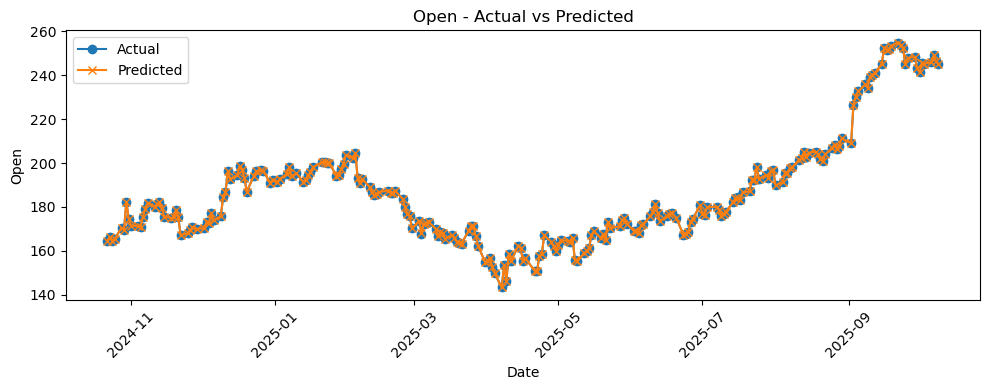

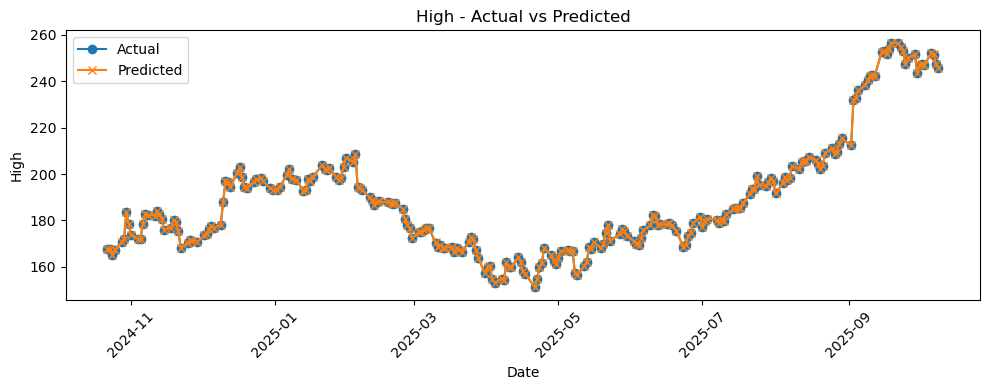

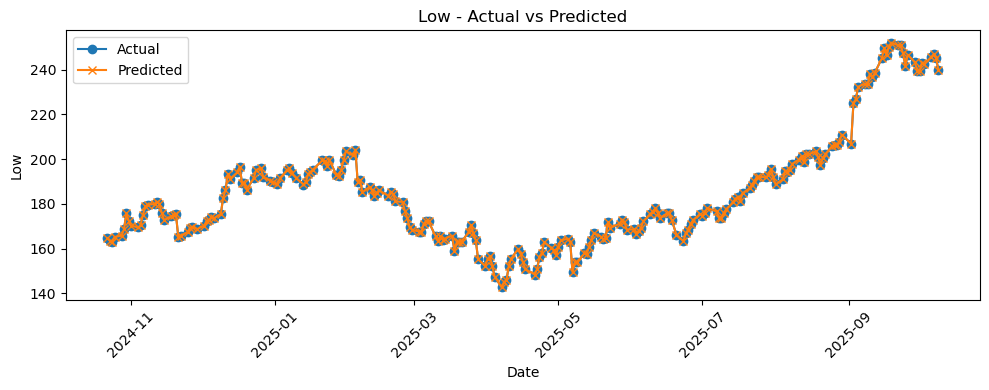

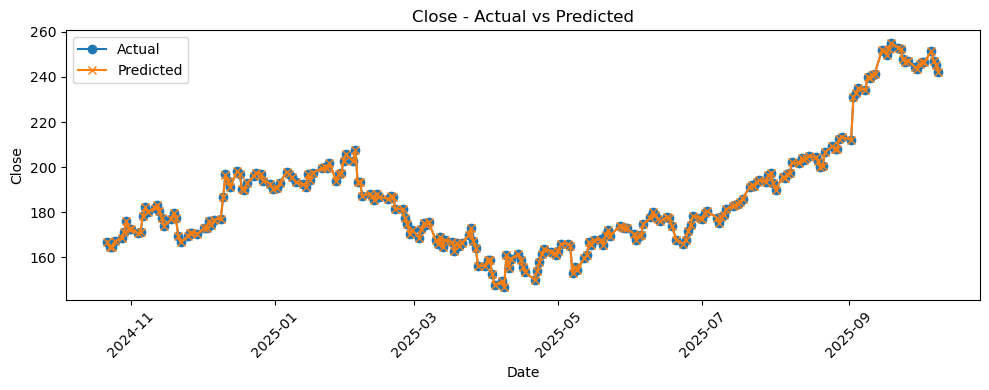

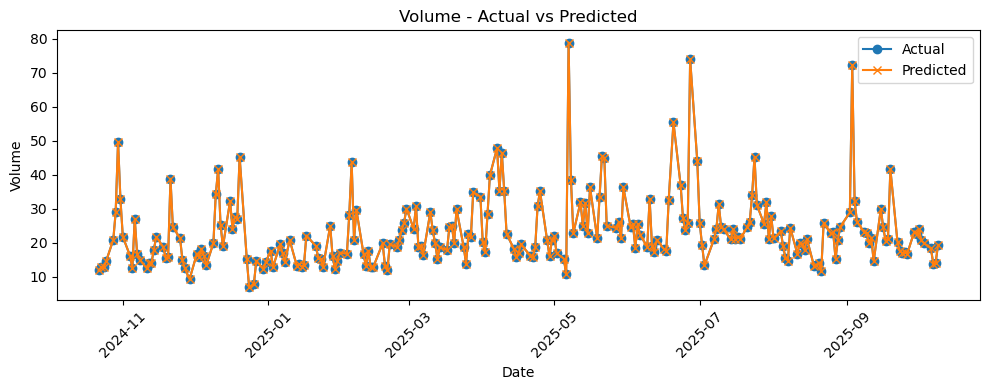

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])

for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[f'{col}_1'] = df[col].shift(1)
    df[f'{col}_2'] = df[col].shift(2)

df['Open_MA3'] = df['Open'].rolling(3).mean()
df['Open_EMA5'] = df['Open'].ewm(span=5, adjust=False).mean()
df['High_MA3'] = df['High'].rolling(3).mean()
df['High_EMA5'] = df['High'].ewm(span=5, adjust=False).mean()
df['Low_MA3'] = df['Low'].rolling(3).mean()
df['Low_EMA5'] = df['Low'].ewm(span=5, adjust=False).mean()
df['Close_MA3'] = df['Close'].rolling(3).mean()
df['Close_EMA5'] = df['Close'].ewm(span=5, adjust=False).mean()

df['High_Low_Range'] = df['High'] - df['Low']
df['Open_Volatility3'] = df['Open'].rolling(3).std()
df['High_Volatility3'] = df['High'].rolling(3).std()
df['Low_Volatility3'] = df['Low'].rolling(3).std()
df['Close_Volatility3'] = df['Close'].rolling(3).std()
df['Volume_Volatility3'] = df['Volume'].rolling(3).std()
df['Volume_MA3'] = df['Volume'].rolling(3).mean()
df['Volume_MA5'] = df['Volume'].rolling(5).mean()

df.dropna(inplace=True)

feature_sets = {
    'Open': ['Open_1','Open_2','Close_1','Close_2','High_1','High_2','Low_1','Low_2',
             'Open_MA3','Open_EMA5','High_Low_Range','Open_Volatility3','Volume'],
    
    'High': ['High_1','High_2','Open_1','Open_2','Close_1','Low_1',
             'High_MA3','High_EMA5','High_Volatility3','High_Low_Range'],
    
    'Low': ['Low_1','Low_2','Open_1','Open_2','Close_1','High_1',
            'Low_MA3','Low_EMA5','Low_Volatility3','High_Low_Range'],
    
    'Close': ['Close_1','Close_2','Open_1','Open_2','High_1','Low_1',
              'Close_MA3','Close_EMA5','Close_Volatility3','High_Low_Range'],
    
    'Volume': ['Volume_1','Volume_2','Open_1','Close_1','High_1','Low_1',
               'Volume_MA3','Volume_MA5','Volume_Volatility3','High_Low_Range']
}

predictions = pd.DataFrame()  
metrics = {}

for target, features in feature_sets.items():
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    
    if target == 'Volume':
        y_train_scaled = y_train.values / 1e6
        y_test_scaled = y_test.values / 1e6
    else:
        y_train_scaled = y_train.values
        y_test_scaled = y_test.values
    
    ridge = Ridge()
    grid = GridSearchCV(ridge, {'alpha':[0.001,0.01,0.1,1,10]}, cv=5)
    grid.fit(X_train_scaled, y_train_scaled)
    
    y_pred_scaled = grid.best_estimator_.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    r2 = r2_score(y_test_scaled, y_pred_scaled)
    metrics[target] = {'Best_alpha': grid.best_params_, 'MSE': mse, 'R2': r2}
    
    if target == 'Volume':
        predictions[f'Actual_{target}_M'] = pd.Series(y_test_scaled, index=y_test.index)
        predictions[f'Pred_{target}_M'] = pd.Series(y_pred_scaled, index=y_test.index)
    else:
        predictions[f'Actual_{target}'] = pd.Series(y_test_scaled, index=y_test.index)
        predictions[f'Pred_{target}'] = pd.Series(y_pred_scaled, index=y_test.index)

predictions['Date'] = df.loc[predictions.index, 'Date']

for target, metric in metrics.items():
    print(f"{target} -> Best alpha: {metric['Best_alpha']}, Test MSE: {metric['MSE']:.6f}, R2: {metric['R2']:.6f}")

print(predictions.tail(10))


predictions_file = "google_stock_predictions.csv"

numeric_cols = predictions.select_dtypes(include=np.number).columns
predictions[numeric_cols] = predictions[numeric_cols].round(2)

predictions.to_csv(predictions_file, index=False)

print(f"Predictions saved successfully to {predictions_file}")

import matplotlib.pyplot as plt

predictions_file = "google_stock_predictions.csv"

numeric_cols = predictions.select_dtypes(include=np.number).columns
predictions[numeric_cols] = predictions[numeric_cols].round(2)

predictions.to_csv(predictions_file, index=False)
print(f"Predictions saved successfully to {predictions_file}")

targets = ['Open', 'High', 'Low', 'Close', 'Volume']

for target in targets:
    plt.figure(figsize=(10,4))
    
    if target == 'Volume':
        actual_col = f'Actual_{target}_M'
        pred_col = f'Pred_{target}_M'
    else:
        actual_col = f'Actual_{target}'
        pred_col = f'Pred_{target}'
    
    plt.plot(predictions['Date'], predictions[actual_col], label='Actual', marker='o')
    plt.plot(predictions['Date'], predictions[pred_col], label='Predicted', marker='x')
    
    plt.title(f"{target} - Actual vs Predicted")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


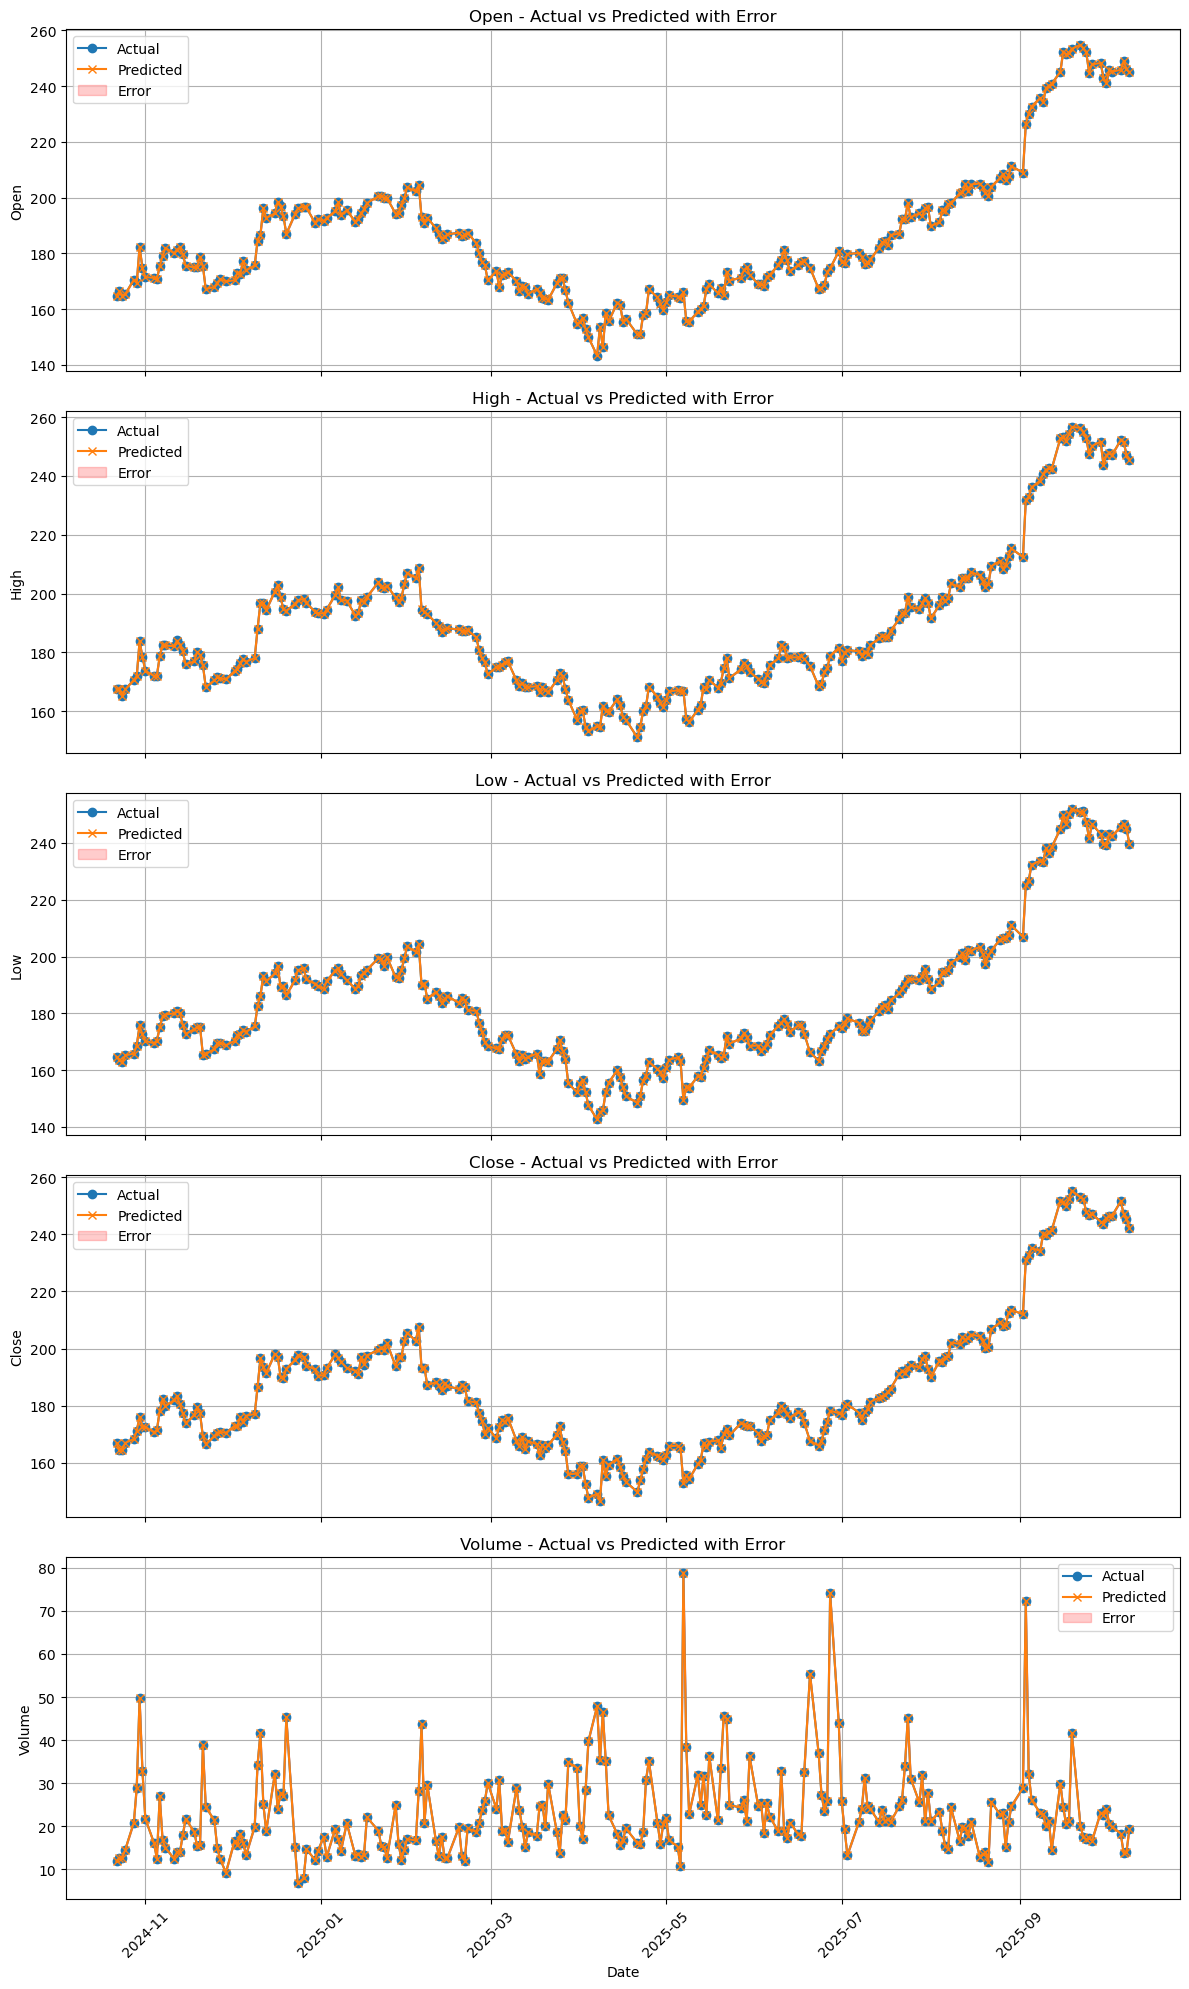

In [17]:
import matplotlib.pyplot as plt

targets = ['Open', 'High', 'Low', 'Close', 'Volume']
fig, axes = plt.subplots(len(targets), 1, figsize=(12, 20), sharex=True)

for i, target in enumerate(targets):
    ax = axes[i]
    
    if target == 'Volume':
        actual_col = f'Actual_{target}_M'
        pred_col = f'Pred_{target}_M'
    else:
        actual_col = f'Actual_{target}'
        pred_col = f'Pred_{target}'
    
    ax.plot(predictions['Date'], predictions[actual_col], label='Actual', marker='o')
    ax.plot(predictions['Date'], predictions[pred_col], label='Predicted', marker='x')

    ax.fill_between(predictions['Date'], predictions[actual_col], predictions[pred_col],
                    color='red', alpha=0.2, label='Error')
    
    ax.set_title(f"{target} - Actual vs Predicted with Error")
    ax.set_ylabel(target)
    ax.legend()
    ax.grid(True)

plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Google Interactive Chart Type for all Price Predictions

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go

df = pd.read_csv("google.csv")
df['Date'] = pd.to_datetime(df['Date'])

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

for col in numeric_cols:
    df[f'{col}_1'] = df[col].shift(1)
    df[f'{col}_2'] = df[col].shift(2)

df['Open_MA3'] = df['Open'].rolling(3).mean()
df['Open_EMA5'] = df['Open'].ewm(span=5, adjust=False).mean()
df['High_MA3'] = df['High'].rolling(3).mean()
df['High_EMA5'] = df['High'].ewm(span=5, adjust=False).mean()
df['Low_MA3'] = df['Low'].rolling(3).mean()
df['Low_EMA5'] = df['Low'].ewm(span=5, adjust=False).mean()
df['Close_MA3'] = df['Close'].rolling(3).mean()
df['Close_EMA5'] = df['Close'].ewm(span=5, adjust=False).mean()

df['High_Low_Range'] = df['High'] - df['Low']
df['Open_Volatility3'] = df['Open'].rolling(3).std()
df['High_Volatility3'] = df['High'].rolling(3).std()
df['Low_Volatility3'] = df['Low'].rolling(3).std()
df['Close_Volatility3'] = df['Close'].rolling(3).std()
df['Volume_Volatility3'] = df['Volume'].rolling(3).std()
df['Volume_MA3'] = df['Volume'].rolling(3).mean()
df['Volume_MA5'] = df['Volume'].rolling(5).mean()

df.dropna(inplace=True)

feature_sets = {
    'Open': ['Open_1','Open_2','Close_1','Close_2','High_1','High_2','Low_1','Low_2',
             'Open_MA3','Open_EMA5','High_Low_Range','Open_Volatility3','Volume'],
    'High': ['High_1','High_2','Open_1','Open_2','Close_1','Low_1',
             'High_MA3','High_EMA5','High_Volatility3','High_Low_Range'],
    'Low': ['Low_1','Low_2','Open_1','Open_2','Close_1','High_1',
            'Low_MA3','Low_EMA5','Low_Volatility3','High_Low_Range'],
    'Close': ['Close_1','Close_2','Open_1','Open_2','High_1','Low_1',
              'Close_MA3','Close_EMA5','Close_Volatility3','High_Low_Range'],
    'Volume': ['Volume_1','Volume_2','Open_1','Close_1','High_1','Low_1',
               'Volume_MA3','Volume_MA5','Volume_Volatility3','High_Low_Range']
}

predictions = pd.DataFrame()
metrics = {}

for target, features in feature_sets.items():
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ridge = Ridge()
    grid = GridSearchCV(ridge, {'alpha':[0.001,0.01,0.1,1,10]}, cv=5)
    grid.fit(X_train_scaled, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics[target] = {'Best_alpha': grid.best_params_, 'MSE': mse, 'R2': r2}
    
    predictions[f'Actual_{target}'] = y_test.values
    predictions[f'Pred_{target}'] = y_pred

predictions['Date'] = df.iloc[-len(predictions):]['Date'].values

for target, metric in metrics.items():
    print(f"{target} -> Best alpha: {metric['Best_alpha']}, Test MSE: {metric['MSE']:.6f}, R2: {metric['R2']:.6f}")

fig = go.Figure()

for target in ['Open', 'High', 'Low', 'Close', 'Volume']:
    fig.add_trace(go.Scatter(
        x=predictions['Date'],
        y=predictions[f'Actual_{target}'],
        mode='lines+markers',
        name=f'Actual {target}',
        hovertemplate=f'Date: %{{x}}<br>Actual {target}: %{{y}}<br>Predicted {target}: %{{customdata}}<extra></extra>',
        customdata=predictions[f'Pred_{target}']
    ))

fig.update_layout(
    title='Google Stock: Actual vs Predicted Prices & Volume',
    xaxis_title='Date',
    yaxis_title='Value',
    hovermode='x unified',
    template='plotly_white'
)

fig.show(renderer="browser")


Open -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000057, R2: 1.000000
High -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000062, R2: 1.000000
Low -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000070, R2: 1.000000
Close -> Best alpha: {'alpha': 0.001}, Test MSE: 0.000051, R2: 1.000000
Volume -> Best alpha: {'alpha': 0.001}, Test MSE: 20805.355057, R2: 1.000000
